# Datathon - "Code Crushers"

## Team: Dheeraj - Marco - Sahaj - Viraj

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('metro data.csv')

print(data.columns)

Index(['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded', 'Stations', 'System length',
       'Annual ridership\r\n(millions)'],
      dtype='object')


# Annual Ridership Trends

In [24]:
# Adjust column name if necessary
column_name = 'Annual ridership\r\n(millions)'

# Use a more flexible regex to handle different formats (e.g., commas)
data[['Annual_ridership', 'Year']] = data[column_name].str.extract(r'([\d,\.]+)\s*\((\d{4})\)')

# Remove commas from 'Annual_ridership' and convert to float
data['Annual_ridership'] = data['Annual_ridership'].str.replace(',', '').astype(float)

# Drop rows with NaN values in 'Annual_ridership' or 'Year'
data = data.dropna(subset=['Annual_ridership', 'Year']).copy()

# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Sort the data by 'Annual_ridership' in descending order to find the top 10 systems
top_10_systems = data.sort_values(by='Annual_ridership', ascending=False).head(10)

# Display the top 10 systems
print(top_10_systems[['City', 'Country\r\nregion', 'Name', 'Annual_ridership', 'Year']])


              City Country\r\nregion                       Name  \
50        Shanghai             China             Shanghai Metro   
125          Tokyo             Japan                Tokyo Metro   
32       Guangzhou             China            Guangzhou Metro   
22         Beijing             China             Beijing Subway   
53        Shenzhen             China             Shenzhen Metro   
136          Seoul       South Korea  Seoul Metropolitan Subway   
157         Moscow            Russia               Moscow Metro   
26         Chengdu             China              Chengdu Metro   
194  New York City     United States       New York City Subway   
90           Delhi             India                Delhi Metro   

     Annual_ridership  Year  
50            2834.69  2020  
125           2757.40  2019  
32            2415.60  2020  
22            2292.65  2020  
53            2178.00  2021  
136           2127.20  2020  
157           2061.80  2022  
26            1800.00 

In [25]:
print(f"Total number of rows before extraction: {len(data)}")


Total number of rows before extraction: 185


In [19]:
# Double check seperation of year and ridership
print(data.head(10))


              City Country\r\nregion                      Name  \
0          Algiers           Algeria             Algiers Metro   
1     Buenos Aires         Argentina  Buenos Aires Underground   
2          Yerevan           Armenia             Yerevan Metro   
3           Sydney         Australia              Sydney Metro   
4           Vienna           Austria             Vienna U-Bahn   
5             Baku        Azerbaijan                Baku Metro   
7            Minsk           Belarus               Minsk Metro   
8         Brussels           Belgium            Brussels Metro   
9   Belo Horizonte            Brazil      Belo Horizonte Metro   
10        Brasília            Brazil    Federal District Metro   

    Service\r\nopened Last\r\nexpanded  Stations        System length  \
0                2011             2018        19    18.5 km (11.5 mi)   
1                1913             2019        78    56.7 km (35.2 mi)   
2                1981             1996        10     1

In [26]:
# overall trends
ridership_trends = data.groupby('Year')['Annual_ridership'].sum().reset_index()

# check data
print(ridership_trends)


    Year  Annual_ridership
0   2009            36.000
1   2010            91.300
2   2011            14.000
3   2015          1314.000
4   2016           870.400
5   2017           358.000
6   2018          1976.200
7   2019         11573.830
8   2020         19889.040
9   2021          9645.200
10  2022         12270.349


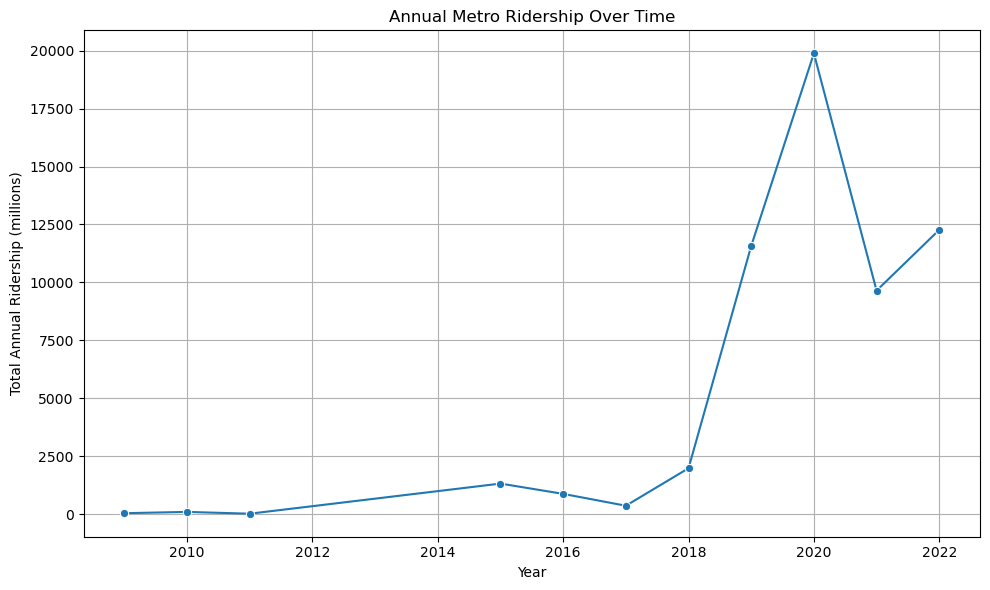

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#annual ridership line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=ridership_trends, x='Year', y='Annual_ridership', marker='o')
plt.title('Annual Metro Ridership Over Time')
plt.xlabel('Year')
plt.ylabel('Total Annual Ridership (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Predictive analysis for Annual Ridership Trends

Mean Squared Error: 22070695.702228375
R-squared: -0.11160943900476128


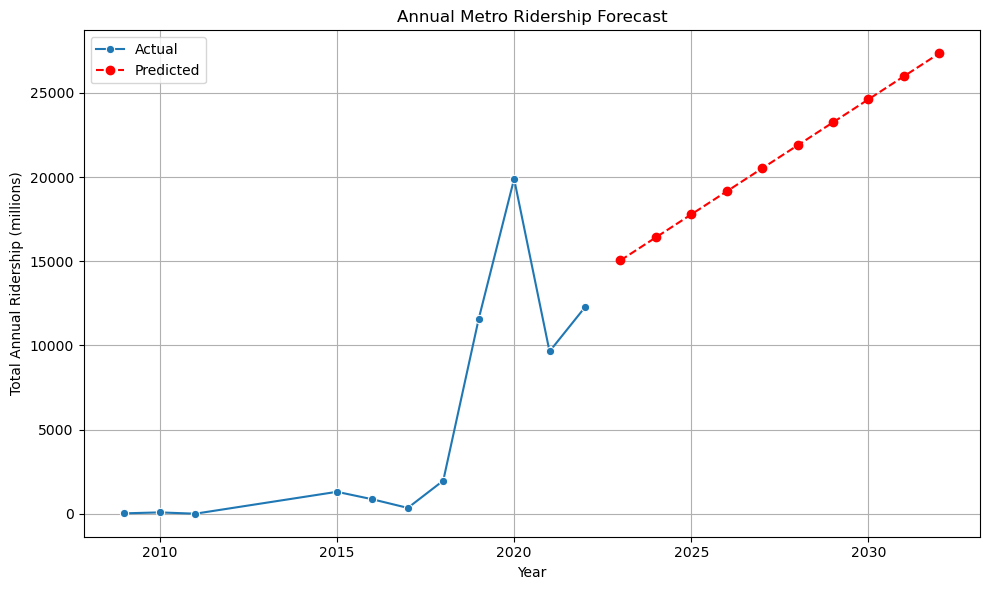

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'ridership_trends' DataFrame is already defined as per your previous work
# The DataFrame should have columns 'Year' and 'Annual_ridership'

# Prepare the data for the linear regression model
X = ridership_trends[['Year']]
y = ridership_trends['Annual_ridership']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set and future years
y_pred = model.predict(X_test)
future_years = pd.DataFrame({'Year': range(2023, 2033)})  # Predict for the next 10 years
future_ridership = model.predict(future_years)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the actual and predicted ridership
plt.figure(figsize=(10, 6))
sns.lineplot(data=ridership_trends, x='Year', y='Annual_ridership', marker='o', label='Actual')
plt.plot(future_years['Year'], future_ridership, marker='o', linestyle='--', color='red', label='Predicted')
plt.title('Annual Metro Ridership Forecast')
plt.xlabel('Year')
plt.ylabel('Total Annual Ridership (millions)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Data Preparation: Use Year as the feature (independent variable) and Annual_ridership as the target (dependent variable).
Splitting Data: train_test_split divides the data into training and testing sets for model evaluation.
Linear Regression: LinearRegression is fitted using the training data.
Prediction: The model predicts ridership for future years (2023-2032).
Evaluation: Mean Squared Error (MSE) and R-squared (R²) scores assess model accuracy.
Visualization: The line plot shows both actual historical ridership and predicted future trends.

In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 22070695.702228375


#Top 10 Metro Systems

In [28]:
# column selection using the original column name
top_10_columns = ['City', 'Country\r\nregion', 'Name', 'Annual_ridership', 'Year']

# display top 10 metro systems by ridership
print(top_10_systems[top_10_columns])


              City Country\r\nregion                       Name  \
50        Shanghai             China             Shanghai Metro   
125          Tokyo             Japan                Tokyo Metro   
32       Guangzhou             China            Guangzhou Metro   
22         Beijing             China             Beijing Subway   
53        Shenzhen             China             Shenzhen Metro   
136          Seoul       South Korea  Seoul Metropolitan Subway   
157         Moscow            Russia               Moscow Metro   
26         Chengdu             China              Chengdu Metro   
194  New York City     United States       New York City Subway   
90           Delhi             India                Delhi Metro   

     Annual_ridership  Year  
50            2834.69  2020  
125           2757.40  2019  
32            2415.60  2020  
22            2292.65  2020  
53            2178.00  2021  
136           2127.20  2020  
157           2061.80  2022  
26            1800.00 

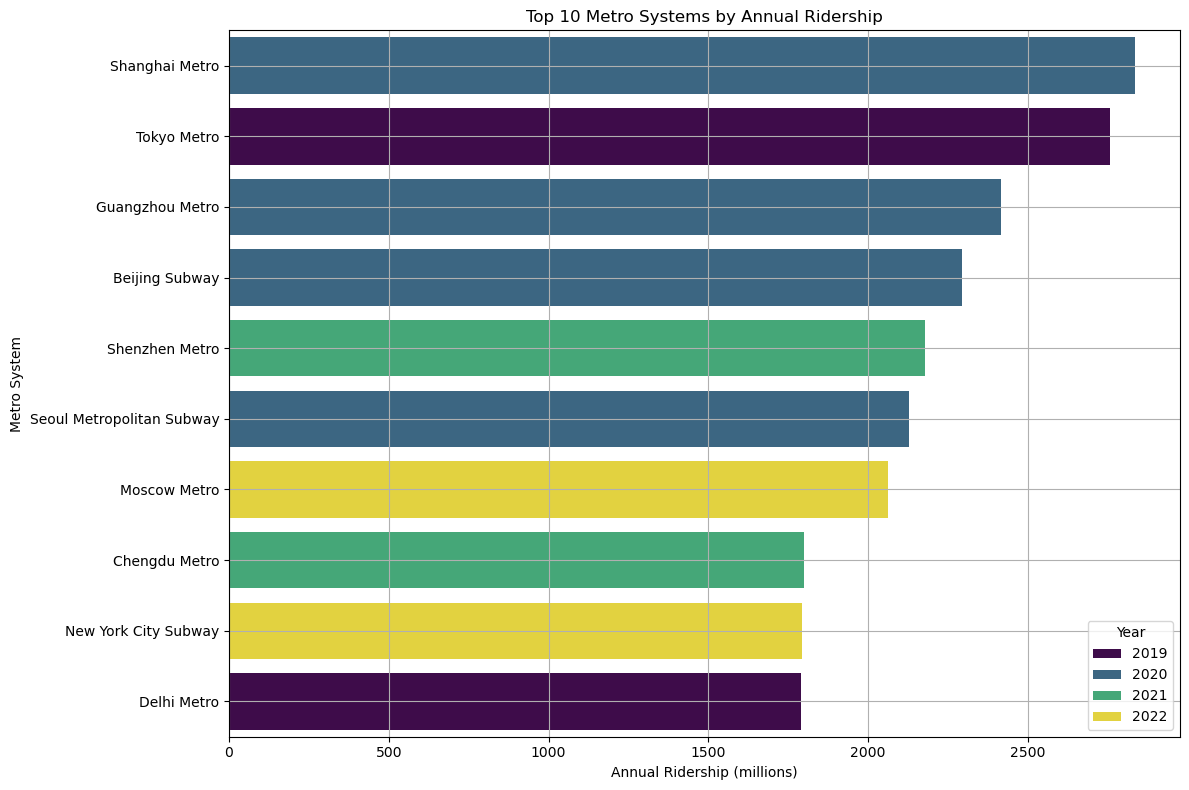

In [34]:
# bar plot for the top 10 metro systems by ridership 
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_systems,
    x='Annual_ridership',
    y='Name',
    hue='Year',
    dodge=False,
    palette='viridis'  
)
plt.title('Top 10 Metro Systems by Annual Ridership')
plt.xlabel('Annual Ridership (millions)')
plt.ylabel('Metro System')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:

print(data.columns)  

# top 10 metro systems by ridership 
top_10_systems[['City', 'Country\r\nregion', 'Name', 'Annual_ridership', 'Year']]


Index(['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded', 'Stations', 'System length',
       'Annual ridership\r\n(millions)', 'Annual_ridership', 'Year'],
      dtype='object')


,City,Country\r\nregion,Name,Annual_ridership,Year
50,Shanghai,China,Shanghai Metro,2834.69,2020
125,Tokyo,Japan,Tokyo Metro,2757.40,2019
32,Guangzhou,China,Guangzhou Metro,2415.60,2020
22,Beijing,China,Beijing Subway,2292.65,2020
53,Shenzhen,China,Shenzhen Metro,2178.00,2021
136,Seoul,South Korea,Seoul Metropolitan Subway,2127.20,2020
157,Moscow,Russia,Moscow Metro,2061.80,2022
26,Chengdu,China,Chengdu Metro,1800.00,2021
194,New York City,United States,New York City Subway,1793.10,2022
90,Delhi,India,Delhi Metro,1790.00,2019


# Distribution of metro lengths: Visualize the total miles of metro systems globally

In [47]:
import pandas as pd

# Load the CSV file 
data = pd.read_csv('metro data.csv')  

# Checkthe data 
print(f"Number of rows in the DataFrame: {len(data)}")
print("Columns in DataFrame:")
print(data.columns)

# Display the first few rows 
print("\nFirst few rows of the DataFrame:")
print(data.head())

# Display the 'System length' column
print("\nSample of 'System length' column:")
print(data['System length'].head(10))


Number of rows in the DataFrame: 205
Columns in DataFrame:
Index(['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded', 'Stations', 'System length',
       'Annual ridership\r\n(millions)'],
      dtype='object')

First few rows of the DataFrame:
           City Country\r\nregion                      Name  \
0       Algiers           Algeria             Algiers Metro   
1  Buenos Aires         Argentina  Buenos Aires Underground   
2       Yerevan           Armenia             Yerevan Metro   
3        Sydney         Australia              Sydney Metro   
4        Vienna           Austria             Vienna U-Bahn   

   Service\r\nopened Last\r\nexpanded  Stations      System length  \
0               2011             2018        19  18.5 km (11.5 mi)   
1               1913             2019        78  56.7 km (35.2 mi)   
2               1981             1996        10   12.1 km (7.5 mi)   
3               2019                –        13      36 km (22 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract km and mile values separately using regex
data['System_length_km'] = data['System length'].str.extract(r'([\d\.]+)\s*km', expand=False)
data['System_length_miles'] = data['System length'].str.extract(r'\(([\d\.]+)\s*mi\)', expand=False)

# Convert the extracted values to float for numerical analysis
data['System_length_km'] = pd.to_numeric(data['System_length_km'], errors='coerce')
data['System_length_miles'] = pd.to_numeric(data['System_length_miles'], errors='coerce')

# Display the first few rows to verify extraction
print("Sample of extracted km and mile values:")
print(data[['System length', 'System_length_km', 'System_length_miles']].head(10))


Sample of extracted km and mile values:
       System length  System_length_km  System_length_miles
0  18.5 km (11.5 mi)              18.5                 11.5
1  56.7 km (35.2 mi)              56.7                 35.2
2   12.1 km (7.5 mi)              12.1                  7.5
3      36 km (22 mi)              36.0                 22.0
4  83.3 km (51.8 mi)              83.3                 51.8
5  40.7 km (25.3 mi)              40.7                 25.3
6   11.7 km (7.3 mi)              11.7                  7.3
7  40.8 km (25.4 mi)              40.8                 25.4
8  39.9 km (24.8 mi)              39.9                 24.8
9  28.1 km (17.5 mi)              28.1                 17.5


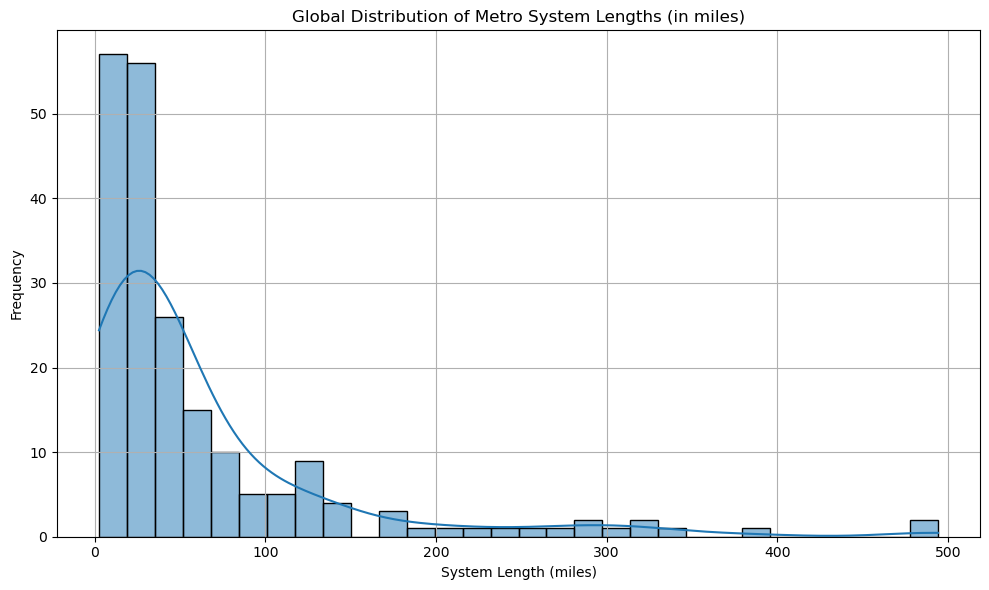

In [51]:
# Step 3: Visualize the distribution using a histogram of miles
plt.figure(figsize=(10, 6))
sns.histplot(data['System_length_miles'], bins=30, kde=True)
plt.title('Global Distribution of Metro System Lengths (in miles)')
plt.xlabel('System Length (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Length vs. ridership: Explore the relationship between system size and ridership

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Extract the ridership values before the parentheses
data['Annual_ridership'] = data['Annual ridership\r\n(millions)'].str.extract(r'([\d\.]+)', expand=False)

# Convert the extracted values to float
data['Annual_ridership'] = pd.to_numeric(data['Annual_ridership'], errors='coerce')

# first few rows to verify extraction
print("Extracted Annual Ridership values:")
print(data[['Annual ridership\r\n(millions)', 'Annual_ridership']].head())


Extracted Annual Ridership values:
  Annual ridership\r\n(millions)  Annual_ridership
0                    45.3 (2019)              45.3
1                    74.0 (2020)              74.0
2                    23.3 (2022)              23.3
3                    16.3 (2022)              16.3
4                   459.8 (2019)             459.8


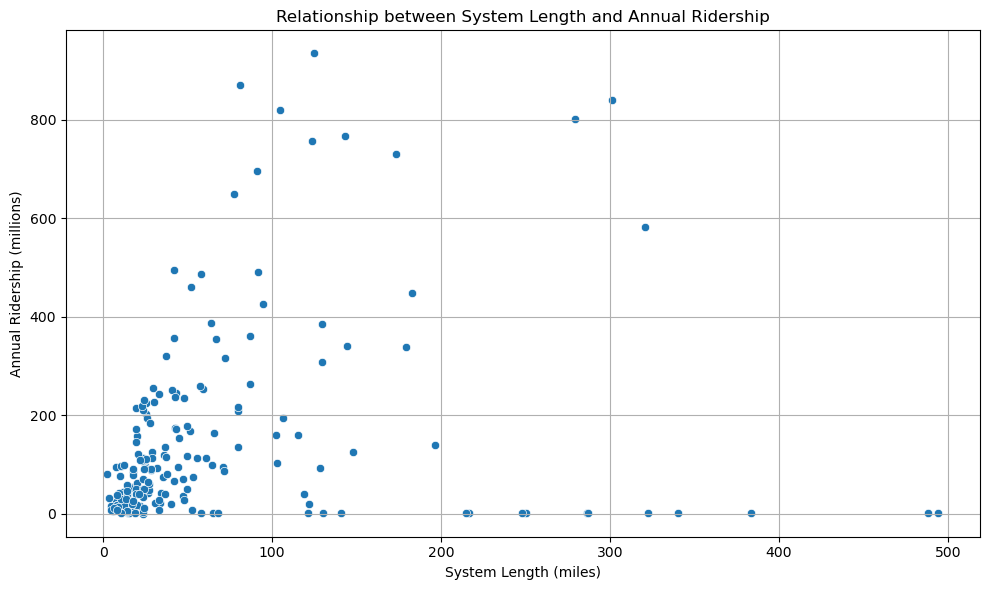

Pearson Correlation Coefficient: 0.23
P-value: 0.0013


In [54]:
# Drop rows with NaN values 
data = data.dropna(subset=['System_length_miles', 'Annual_ridership'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['System_length_miles'], y=data['Annual_ridership'])
plt.title('Relationship between System Length and Annual Ridership')
plt.xlabel('System Length (miles)')
plt.ylabel('Annual Ridership (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Pearson correlation 
correlation, p_value = pearsonr(data['System_length_miles'], data['Annual_ridership'])

print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")


# Track how systems have grown overtime

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Service_opened' and 'Last_expanded' are numeric
data['Service_opened'] = pd.to_numeric(data['Service\r\nopened'], errors='coerce')
data['Last_expanded'] = pd.to_numeric(data['Last\r\nexpanded'], errors='coerce')

# Use the 'System_length_miles' column directly
data['Total_system_length_miles'] = data['System_length_miles']

# cleaned data
print("Sample of cleaned year data:")
print(data[['Service_opened', 'Last_expanded', 'Total_system_length_miles']].head(10))


Sample of cleaned year data:
    Service_opened  Last_expanded  Total_system_length_miles
0             2011         2018.0                      11.50
1             1913         2019.0                      35.20
2             1981         1996.0                       7.50
3             2019            NaN                      22.00
4             1978         2017.0                      51.80
5             1967         2022.0                      25.30
7             1984         2020.0                      25.40
8             1976         2009.0                      24.80
9             1986         2002.0                      17.50
10            2001         2020.0                      26.33


/var/folders/1_/sjwl03s576x6_ydy_qwp8y_w0000gn/T/ipykernel_28537/582293935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Service_opened'] = pd.to_numeric(data['Service\r\nopened'], errors='coerce')
/var/folders/1_/sjwl03s576x6_ydy_qwp8y_w0000gn/T/ipykernel_28537/582293935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Last_expanded'] = pd.to_numeric(data['Last\r\nexpanded'], errors='coerce')
/var/folders/1_/sjwl03s576x6_ydy_qwp8y_w0000gn/T/ipykernel_28537/582293935.py:9: SettingWithCo

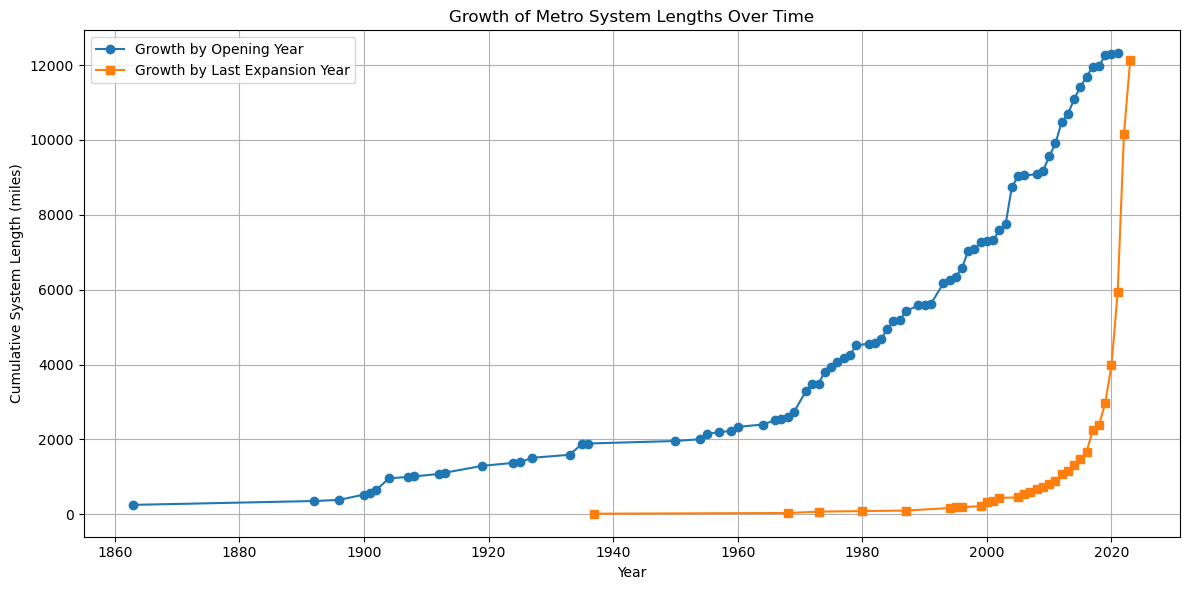

In [59]:
# Group data by 'Service_opened' to calculate the total length of metro systems opened in each year
yearly_growth_opened = (
    data.groupby('Service_opened')['Total_system_length_miles']
    .sum()
    .cumsum()
)

# Group data by 'Last_expanded' to calculate the total length of expansions
yearly_growth_expanded = (
    data.groupby('Last_expanded')['Total_system_length_miles']
    .sum()
    .cumsum()
)

# Plots
plt.figure(figsize=(12, 6))
plt.plot(
    yearly_growth_opened.index,
    yearly_growth_opened.values,
    marker='o',
    label='Growth by Opening Year',
)
plt.plot(
    yearly_growth_expanded.index,
    yearly_growth_expanded.values,
    marker='s',
    label='Growth by Last Expansion Year',
)
plt.title('Growth of Metro System Lengths Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative System Length (miles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# % of countries with metro systems: Determine the global percentage of metro-adopting nations

In [60]:
# Number of unique countries with metro systems in the dataset
countries_with_metros = data['Country\r\nregion'].nunique()

# Total number of countries worldwide 

total_countries_worldwide = 195

# Calculate the percentage of countries with metro systems
percentage_countries_with_metros = (countries_with_metros / total_countries_worldwide) * 100

# Display 
print(f"Number of countries with metro systems: {countries_with_metros}")
print(f"Percentage of countries with metro systems: {percentage_countries_with_metros:.2f}%")


Number of countries with metro systems: 58
Percentage of countries with metro systems: 29.74%


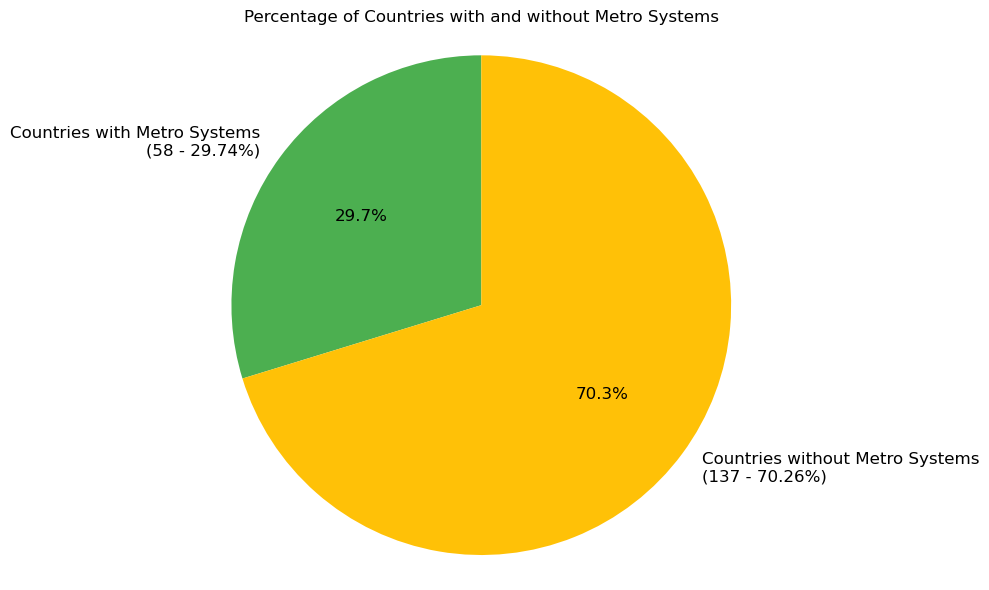

In [63]:
import matplotlib.pyplot as plt

# Data for the pie chart
countries_with_metros = 58  
total_countries_worldwide = 195  
countries_without_metros = total_countries_worldwide - countries_with_metros
percentage_countries_with_metros = (countries_with_metros / total_countries_worldwide) * 100
percentage_countries_without_metros = 100 - percentage_countries_with_metros

labels = [
    f'Countries with Metro Systems\n({countries_with_metros} - {percentage_countries_with_metros:.2f}%)',
    f'Countries without Metro Systems\n({countries_without_metros} - {percentage_countries_without_metros:.2f}%)'
]
sizes = [countries_with_metros, countries_without_metros]
colors = ['#4CAF50', '#FFC107']

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Percentage of Countries with and without Metro Systems')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.tight_layout()
plt.show()


## Predictive Analysis
